In [4]:
import os 
from tqdm import tqdm
from collections import Counter
import pandas as pd
from keras.models import model_from_json
import cv2
import numpy as np

Using TensorFlow backend.
/home/dev/Documents/Project_age_gender/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dev/Documents/Project_age_gender/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dev/Documents/Project_age_gender/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/de

In [5]:
# !pip install pandas

In [6]:
label_age = {
        '0': '(1-12)',
        '1': '(13-18)',
        '2': '(19- 22)',
        '3': '(23-29)',
        '4': '(30-34)',
        '5': '(35-39)',
        '6': '(40-44)',
        '7': '(45-50)',
        '8': '(51-59)',
        '9': '(>60)'
}

FEMALE = 0
MALE = 1


In [14]:
#thong ke tuoi trong tap test
def expoler_age(path_folder):
    list_age = []
    with open(path_folder, "r") as f:
        for line in f:
            age = int(line.strip())
            if age <= 12:
                age = "0"
            elif  13 <= age and age <= 18:
                age = "1"
            elif  19 <= age <= 22:
                age = "2"
            elif  23 <= age <= 29:
                age = "3"
            elif 30 <= age <= 34:
                age = "4"
            elif 35 <= age <= 39:
                age = "5"
            elif 40 <= age <= 44:
                age = "6"
            elif 45 <= age <= 50:
                age = "7"
            elif 51 <= age <= 59:
                age = "8"
            elif age >=60:
                age = "9"
            list_age.append(age)
    
    return list_age

Counter({'0': 1349, '3': 743, '4': 465, '1': 435, '2': 368, '5': 223, '6': 111, '9': 88, '7': 82, '8': 81})
3945


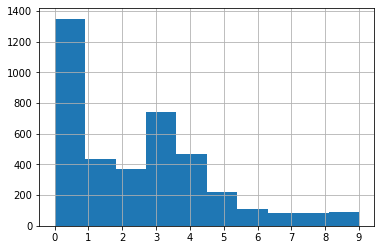

In [15]:
list_age_test = expoler_age("./list/test_age.txt")
print(Counter(list_age_test))
print(len(list_age_test))
#visulize
df_age_test = pd.DataFrame(index = range(0, len(list_age_test)), columns=["age"])
df_age_test["age"] = list_age_test 
histogram_age = df_age_test['age'].hist(bins=df_age_test['age'].nunique())


Counter({'3': 7593, '0': 5912, '5': 4203, '8': 4117, '6': 3500, '2': 3286, '4': 3285, '1': 3004, '7': 3001, '9': 2099})
40000


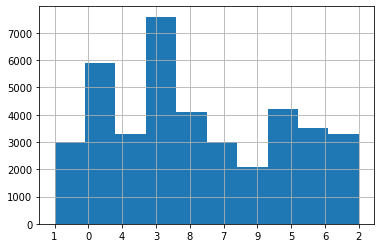

In [16]:
#thong ke tuoi cho tap train
list_age_train = expoler_age("./list/train_age.txt")
print(Counter(list_age_train))
print(len(list_age_train))
#visulize
df_age_train = pd.DataFrame(index = range(0, len(list_age_train)), columns=["age"])
df_age_train["age"] = list_age_train 
histogram_age = df_age_train['age'].hist(bins=df_age_train['age'].nunique())

In [17]:
#thong ke size anh
def statistic_size_image(path_foler):
    list_image = os.listdir(path_foler)
    list_shape = []
    for img in tqdm(list_image):
        path_image = os.path.join(path_foler, img)
        image = cv2.imread(path_image)
        list_shape.append(image.shape)
    return list_shape

# list_shape_test = statistic_size_image("./test")
# print(len(list_shape_test))
# list_shape_train = statistic_size_image("./train")
# print(Counter(list_shape_test))



In [18]:
#visulize shape
# total_shape = list_shape_train+ list_shape_test
# print(Counter(total_shape))
# df_total_shape = pd.DataFrame(index = range(0, len(total_shape)), columns=["shape"])
# df_total_shape["shape"] = total_shape 
# histogram_shape = df_total_shape['shape'].hist(bins=df_total_shape['shape'].nunique())


In [20]:
# load model
def load_model(model_path):

    json_file = open(model_path + '/inceptionv4.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)

    # load weights into new model
    model.load_weights(model_path + "/inceptionv4.h5")
    print("Loaded model from disk")


    return model

model = load_model("../inceptionv4/model_v4/model_v4_dropout")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loaded model from disk


In [21]:
#gan nhan gender
def set_gender(path_folder_origin, path_foler_save, list_age):
    if not os.path.exists(path_foler_save):
        os.mkdir(path_foler_save)
    for i in tqdm(range(len(list_age))):
        try:
            img_path = os.path.join(path_folder_origin,str(i+1)+".jpg")
            img = cv2.imread(img_path)
            #luu anh goc
            img_origin = img

            img =img/255
            img = cv2.resize(img,(224, 224))
            img = img.reshape(1, 224, 224, 3)
        except:
            print("pass")
            continue
        if img is None:
            continue
        gender, _ = model.predict(img)
        gender = np.argmax(gender)
        # neu thu muc tuoi chua ton tai , tao no
        age_dir_path = os.path.join(path_foler_save, str(list_age[i]))
        if not os.path.exists(age_dir_path):
            os.mkdir(age_dir_path)
        #neu thu muc gen der chua ton tai , create
        
        gender_dir_path = os.path.join(age_dir_path, str(gender))
        if not os.path.exists(gender_dir_path):
            os.mkdir(gender_dir_path)
        #save image
        cv2.imwrite(os.path.join(gender_dir_path, str(i)+".jpg"), img_origin)
        
set_gender("./test", "./data_process/test", list_age_test)
set_gender("./train", "./data_process/train", list_age_train)


100%|██████████| 40000/40000 [2:42:17<00:00,  4.11it/s]  
